In [1]:
import os
import json

import numpy as np
from scipy.spatial.transform import Rotation as R

from camera_pose_visualizer import CameraPoseVisualizer

In [2]:
json_path = "./data/calibration_data.json"

with open(json_path, "r") as f:
    calibration_data = json.load(f)

In [3]:
rvecs = np.array(calibration_data["rvecs"])
tvecs = np.array(calibration_data["tvecs"])

print(f"rvecs: {rvecs.shape}")
print(f"tvecs: {tvecs.shape}")

rvecs: (33, 3, 1)
tvecs: (33, 3, 1)


In [4]:
extrinsics = []

for rvec, tvec in zip(rvecs, tvecs):
    rotation_matrix = R.from_rotvec(rvec.reshape(-1)).as_matrix()
    homogeneous_row = np.array([[0, 0, 0, 1]])
    extrinsic = np.concatenate([rotation_matrix, tvec.reshape(3, 1)], axis=1)
    extrinsic = np.concatenate([extrinsic, homogeneous_row], axis=0)
    extrinsics.append(extrinsic)

extrinsics = np.array(extrinsics)

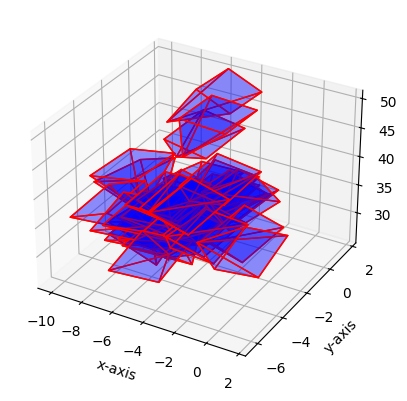

In [6]:
visualizer = CameraPoseVisualizer()

for extrinsic in extrinsics:
    visualizer.add_camera(extrinsic)

visualizer.show()

In [7]:
elev_list = [0, 45, 90, 135, 180, 225, 270, 315]
azim_list = [0, 45, 90, 135, 180, 225, 270, 315]

save_dir = "./data/img"

if not os.path.exists(save_dir):
    os.makedirs(save_dir, exist_ok=True)

for i, elev in enumerate(elev_list):
    for j, azim in enumerate(azim_list):
        visualizer.rotate_view(elev=elev, azim=azim)
        save_path = os.path.join(save_dir, f"camera_pose_{i}_{j}.png")
        visualizer.save(save_path)